<a href="https://colab.research.google.com/github/szyxxx/MachineLearning-TelkomUniversity/blob/main/Clustering/SKLEARN/AXELDAVID_1103210017_TK4504_SKLEARN_CLUSTERING_CLUSTERING_PERFORMANCE_EVALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Axel David<br>
1103210017<br>
SKLearn Clustering<br>


# Import Library

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from google.colab import drive
import zipfile

# Import Dataset

In [31]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
! chmod 600 /content/drive/MyDrive/ColabNotebooks/kaggle_conf/kaggle.json

In [33]:
! KAGGLE_CONFIG_DIR=/content/drive/MyDrive/ColabNotebooks/kaggle_conf/ kaggle datasets download -d shwetabh123/mall-customers

mall-customers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
zip_file = zipfile.ZipFile('/content/drive/MyDrive/ColabNotebooks/dataset/mall-customers.zip','r')
zip_file.extractall('/content/drive/MyDrive/ColabNotebooks/dataset/')

# Informasi Dataset

In [35]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [38]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)
df = pd.get_dummies(df, columns=['Gender'])
df['Gender'] = df['Gender_Male'].astype(int)

In [39]:
df.dtypes

CustomerID                int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender_Female              bool
Gender_Male                bool
Gender                    int64
dtype: object

# Define the list of clustering evaluation metrics

In [40]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].values

score_funcs = [
    ("V-measure", metrics.v_measure_score),
    ("Rand index", metrics.rand_score),
    ("ARI", metrics.adjusted_rand_score),
    ("MI", metrics.mutual_info_score),
    ("NMI", metrics.normalized_mutual_info_score),
    ("AMI", metrics.adjusted_mutual_info_score),
    ("Calinski-Harabasz", metrics.calinski_harabasz_score),
    ("Davies-Bouldin", metrics.davies_bouldin_score)
]

# Define functions to generate random labels

In [41]:
def random_labels(n_samples, n_classes):
    rng = np.random.RandomState(0)
    return rng.randint(low=0, high=n_classes, size=n_samples)

# Define functions to compute clustering evaluation scores

In [42]:
def fixed_classes_uniform_labelings_scores(
    score_func, n_samples, n_clusters_range, n_classes, n_runs=5
):
    scores = np.zeros((len(n_clusters_range), n_runs))
    labels_a = random_labels(n_samples=n_samples, n_classes=n_classes)

    for i, n_clusters in enumerate(n_clusters_range):
        for j in range(n_runs):
            labels_b = random_labels(n_samples=n_samples, n_classes=n_clusters)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores

def uniform_labelings_scores(score_func, n_samples, n_clusters_range, n_runs=5):
    scores = np.zeros((len(n_clusters_range), n_runs))

    for i, n_clusters in enumerate(n_clusters_range):
        for j in range(n_runs):
            labels_a = random_labels(n_samples=n_samples, n_classes=n_clusters)
            labels_b = random_labels(n_samples=n_samples, n_classes=n_clusters)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores

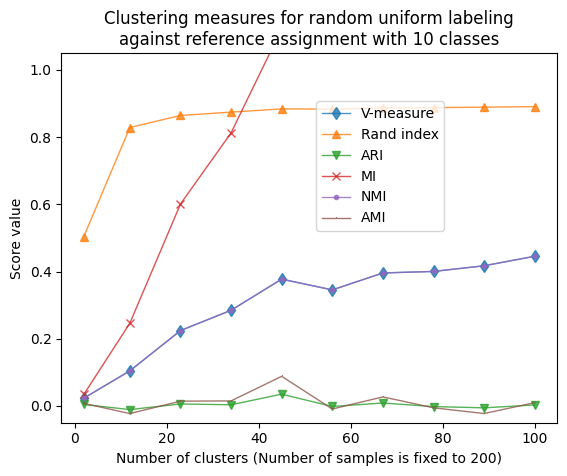

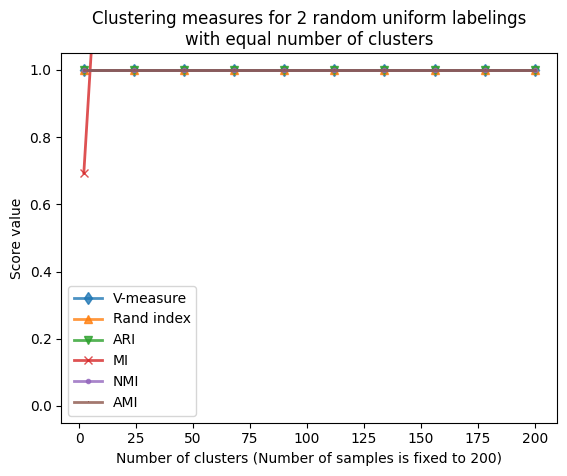

In [43]:
n_samples = len(X)
n_classes = 10
n_clusters_range = np.linspace(2, 100, 10).astype(int)

plt.figure(1)
plots = []
names = []

for marker, (score_name, score_func) in zip("d^vx.,", score_funcs):
    scores = fixed_classes_uniform_labelings_scores(
        score_func, n_samples, n_clusters_range, n_classes=n_classes
    )
    plots.append(
        plt.errorbar(
            n_clusters_range,
            scores.mean(axis=1),
            scores.std(axis=1),
            alpha=0.8,
            linewidth=1,
            marker=marker,
        )[0]
    )
    names.append(score_name)

plt.title(
    "Clustering measures for random uniform labeling\n"
    f"against reference assignment with {n_classes} classes"
)
plt.xlabel(f"Number of clusters (Number of samples is fixed to {n_samples})")
plt.ylabel("Score value")
plt.ylim(bottom=-0.05, top=1.05)
plt.legend(plots, names, bbox_to_anchor=(0.5, 0.5))
plt.show()

n_clusters_range = np.linspace(2, n_samples, 10).astype(int)

plt.figure(2)
plots = []
names = []

for marker, (score_name, score_func) in zip("d^vx.,", score_funcs):
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range)
    plots.append(
        plt.errorbar(
            n_clusters_range,
            np.median(scores, axis=1),
            scores.std(axis=1),
            alpha=0.8,
            linewidth=2,
            marker=marker,
        )[0]
    )
    names.append(score_name)

plt.title(
    "Clustering measures for 2 random uniform labelings\nwith equal number of clusters"
)
plt.xlabel(f"Number of clusters (Number of samples is fixed to {n_samples})")
plt.ylabel("Score value")
plt.legend(plots, names)
plt.ylim(bottom=-0.05, top=1.05)
plt.show()